<a href="https://colab.research.google.com/github/sahil-ansari-15/Cat_vs_Dog_classifier_using_CNN/blob/main/cats_vs_dogs_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 42.1MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 105ms/step - loss: 1.3411 - accuracy: 0.5862 - val_loss: 0.6120 - val_accuracy: 0.6628
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5888 - accuracy: 0.6919 - val_loss: 1.0246 - val_accuracy: 0.6350
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5122 - accuracy: 0.7516 - val_loss: 0.5206 - val_accuracy: 0.7482
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4389 - accuracy: 0.7955 - val_loss: 0.7847 - val_accuracy: 0.6124
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3778 - accuracy: 0.8317 - val_loss: 0.5416 - val_accuracy: 0.7496
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3026 - accuracy: 0.8694 - val_loss: 0.5110 - val_accuracy: 0.7532
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2362 - accuracy: 0.9008 - val_loss: 0.8665 - val_ac

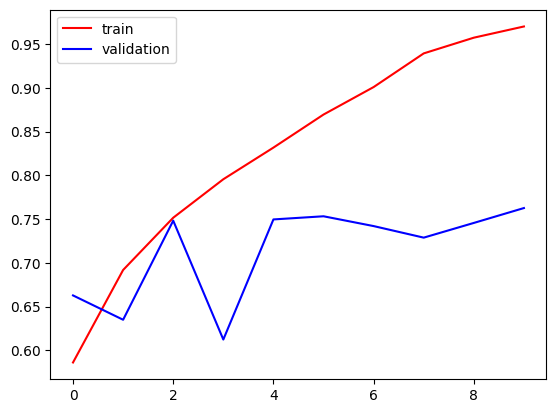

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

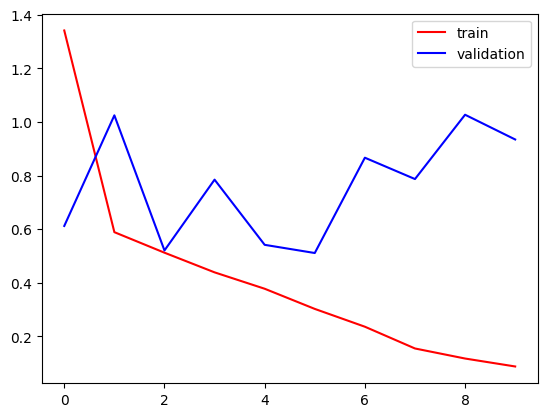

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [23]:
import cv2

In [36]:
test_img = cv2.imread('/content/a_cat_image.jpg')

In [37]:
test_img

array([[[ 64,  61,  57],
        [ 64,  61,  57],
        [ 64,  61,  57],
        ...,
        [ 86,  82,  77],
        [ 86,  82,  77],
        [ 86,  82,  77]],

       [[ 65,  62,  58],
        [ 65,  62,  58],
        [ 65,  62,  58],
        ...,
        [ 86,  82,  77],
        [ 86,  82,  77],
        [ 86,  82,  77]],

       [[ 65,  62,  58],
        [ 65,  62,  58],
        [ 65,  62,  58],
        ...,
        [ 86,  82,  77],
        [ 86,  82,  77],
        [ 86,  82,  77]],

       ...,

       [[ 93,  83,  66],
        [ 93,  83,  66],
        [ 93,  83,  66],
        ...,
        [106,  98,  91],
        [106,  98,  91],
        [106,  98,  91]],

       [[ 93,  83,  66],
        [ 93,  83,  66],
        [ 93,  83,  66],
        ...,
        [106,  98,  91],
        [106,  98,  91],
        [106,  98,  91]],

       [[ 93,  83,  66],
        [ 93,  83,  66],
        [ 93,  83,  66],
        ...,
        [106,  98,  91],
        [106,  98,  91],
        [106,  98,  91]]

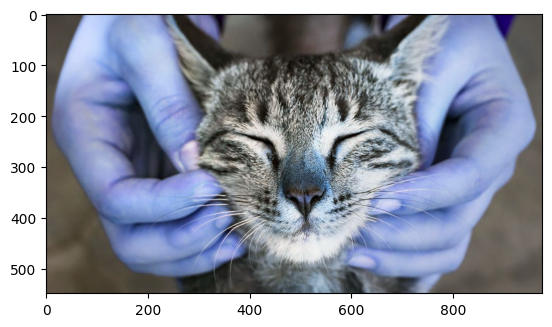

In [38]:
plt.imshow(test_img)

In [39]:
test_img.shape

(549, 976, 3)

In [40]:
test_img = cv2.resize(test_img,(256,256))

In [41]:
test_img.shape

(256, 256, 3)

In [42]:
test_input = test_img.reshape((1,256,256,3))

In [43]:
test_img.shape

(256, 256, 3)

In [47]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [49]:
model_output = model.predict(test_input)[0][0]

if model_output==0:
  print('The given image contains Cat')
else:
  print('The given image contains Dog')

1/1 [==============================] - 0s 21ms/step
The given image contains Cat
